In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

### Q3. Code to find a 3-configuration on n points

##### I am using projected gradient descent to solve this problem. 
##### Objective function : maximize ΣΣ|Pi - Pj| subject to |Pi| = 1 for all n


In [2]:
def objective_function(points):
    # Calculate the sum of pairwise distances between points
    sum_distances = 0
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            sum_distances += np.linalg.norm(points[i] - points[j])
    return sum_distances

def gradient(points):
    # Calculate the gradient of the objective function with respect to each point
    grad = np.zeros_like(points)
    for i in range(len(points)):
        for j in range(len(points)):
            if i == j:
                continue
            grad[i] += 2*(points[i] - points[j]) / np.linalg.norm(points[i] - points[j])
    return grad

def project_to_sphere(points):
    # Project the points on the unit sphere
    for i in range(len(points)):
        points[i] = points[i] / np.linalg.norm(points[i])
    return points    

# def gradient_descent(points, learning_rate=0.01, num_iterations=10000):
    
#     for i in range(num_iterations):
#         # Calculate the gradient and update the points
#         grad = gradient(points)
#         points += learning_rate * grad
#         project_to_sphere(points)
#     return points

def gradient_descent(points, learning_rate=0.01, num_iterations=30000):
    
    for i in range(num_iterations):
        # Calculate the gradient and update the points
        grad = gradient(points)
        points_new = points + learning_rate * grad
        # if i == 0:
        #     points_new = points + learning_rate * grad
        # else:
        #     points_new = points + learning_rate * grad + 0.9*(np.subtract(points,points_prev))
        if np.linalg.norm(np.subtract(points_new, points),2) <= 10e-7:
            print('cut')
            break
        # points += learning_rate * grad
        project_to_sphere(points_new)
        points_prev = points
        points = points_new
        
       
    return points


def optimize(d,n):
    # Initialize the points randomly on the unit sphere
    # X = np.random.normal(size=(n, d))
    points = np.random.normal(size=(n, d))
    points = project_to_sphere(points)
    
    # Normalize the points to lie on the unit sphere
    # points /= np.linalg.norm(points, axis=1)[:, np.newaxis]

    # Optimize the points using gradient descent
    X_opt = gradient_descent(points)
    return X_opt        

def plot3D(points):
    u, v = np.mgrid[0:2*np.pi:20*2j, 0:np.pi:20*1j]
    X = 1 * np.cos(u)*np.sin(v)
    Y = 1 * np.sin(u)*np.sin(v)
    Z = 1 * np.cos(v)

    fig = go.Figure([go.Surface(x=X, y=Y, z=Z, opacity=0.5)])
    
    fig.add_traces(
        px.scatter_3d(pd.DataFrame(points),x=0,y=1,z=2).data
    )
    return fig

In [3]:
# Testing the logic for 3-point 3-configuration
d = 3
n = 3
X_opt = optimize(d,n)
print('{}-point {}-configuration '.format(n,d))
print(X_opt)



3-point 3-configuration 
[[ 0.81335599  0.5453484   0.20260098]
 [-0.51667308  0.1658005  -0.83997567]
 [-0.2966829  -0.7111489   0.63737469]]


### Q4. Find a three-point 3-configuration. Show that the configuration is flat

##### Three points are always coplanar. To show that the configuration is flat, we can verify that 3 points are coplanaer but not collinear
##### (i) The points are coplanar of the scalar triple product is zero ie. (axb).c = 0
##### (ii) If points A, B, and C are collinear, then the length of the largest side is equal to the sum of other two.
##### The 3 points generated using 3-Goncharov configuration will be flat as they lie on the same plane and are not collinear

In [376]:
### Code goes here
d = 3
n = 3
X_opt = optimize(d,n)
scalar_triple_product = np.dot(np.cross(X_opt[0], X_opt[1]),X_opt[2])
len_list = []
for i in range(X_opt.shape[0]):
    for j in range(i+1, X_opt.shape[0]):
        dist = np.linalg.norm(X_opt[i] - X_opt[j])
        len_list.append(round(dist,4))
       
len_list.sort() # sorting the lenght list so that the maximum length takes the last index

if abs(scalar_triple_product) < 10e-10 and len_list[-1] != len_list[0] + len_list[1]:
    print('------------------------------Output------------------------------')
    print('{}-point {}-configuration is flat'.format(n,d))
    print('------------------------------------------------------------------')
else:
    print('------------------------------Output------------------------------')
    print('{}-point {}-configuration is not flat'.format(n,d))
    print('------------------------------------------------------------------')
    


------------------------------Output------------------------------
3-point 3-configuration is flat
------------------------------------------------------------------


### Q5. Find a four-point 3-configuration. Show that the configuration isn’t flat.

##### To show this we can form a plane using 3 points and verify the the forth point doesn't lie on the plane.
##### If D.[(B-A)x(C-A)]+k = 0 then A,B,C,D lie on a plane otherwise not. where k= -[(B - A)x(C - A)].A
##### It can be observed in the output of the code below that the four points generated from 3-Goncharov configuration does not lie on the same plane. Therefore the configuration is not flat

In [375]:
# Code goes here
d = 3
n = 4
X_opt = optimize(d,n)
# print(X_opt)

A,B,C,D = X_opt
i = B - A
j = C - A
z = np.cross(i,j)
k = -np.dot(z,A)

if abs(np.dot(z,D)+k) < 10e-10:
    print('------------------------------Output------------------------------')
    print('{}-point {}-configuration Same plane'.format(n,d))
    print('------------------------------------------------------------------')
else:
    print('------------------------------Output------------------------------')
    print('{}-point {}-configuration Not same plane. Therefore, not flat'.format(n,d))
    print('------------------------------------------------------------------')
    

------------------------------Output------------------------------
4-point 3-configuration Not same plane. Therefore, not flat
------------------------------------------------------------------


### Q6. Angles and distances

##### We can calculate the distances and angles of the points obtained from d-Goncharov configuration.  
##### As we can observe from the output the distance and angle between any two points is equal.

In [379]:
def calc_distance_angles(X_opt, n):
    gc_distances = []
    angle_list = []  
    dist = [[0 for _ in range(n)] for _ in range(n)]
    angle = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(X_opt.shape[0]):
        for j in range(X_opt.shape[0]):
            if i!=j:
                dist[i][j] = round(np.linalg.norm(X_opt[i] - X_opt[j], keepdims=True).tolist()[0],2)
                angle_val = math.acos(np.dot(X_opt[i], X_opt[j]))*180/math.pi
                angle[i][j] = round(angle_val,2) 
                
    for i in range(len(dist)):
        dist[i] = np.sort(dist[i]).tolist()
        angle[i] = np.sort(angle[i]).tolist()
        
    # print("Distinct Sets of Distances for: Y{}".format(n))
    # print(np.unique(dist, axis = 0))
    # print("Distinct Sets of Angels for: Y{}".format(n))
    # print(np.unique(angle, axis = 0))
    
    return dist, angle

#### For three-point 3-configuration
#### We can observe that the set of distances and angles to the other points is the same regardless of what point you measure from.
#### I executed multiple iterations with random initial starting points and observed that the configuration of the points always remains same as reflected in the output below his implies that the configuration is regular
#### Shape: Triangle
#### For n=3
#### Distinct Set of distances:  [0.0, 1.73, 1.73]
#### Distinct Set of angles: [0.0, 120.0, 120.0]

In [385]:
d=3
n=3

for i in range(0,6):
    print('i=',i)
    print('-----------------For four point 3-configuration:-------------------')
    distances, angles = calc_distance_angles(optimize(d,n),n)
    print('distances: ', distances)
    print('angles: ', angles)
    print('Distinct Sets of Distances:', len(np.unique(distances, axis = 0)))
    print('Distinct Sets of Angels:', len(np.unique(angles, axis = 0)))

distances.clear()
angles.clear()


i= 0
-----------------For four point 3-configuration:-------------------
distances:  [[0.0, 1.73, 1.73], [0.0, 1.73, 1.73], [0.0, 1.73, 1.73]]
angles:  [[0.0, 120.0, 120.0], [0.0, 120.0, 120.0], [0.0, 120.0, 120.0]]
Distinct Sets of Distances: 1
Distinct Sets of Angels: 1
i= 1
-----------------For four point 3-configuration:-------------------
distances:  [[0.0, 1.73, 1.73], [0.0, 1.73, 1.73], [0.0, 1.73, 1.73]]
angles:  [[0.0, 120.0, 120.0], [0.0, 120.0, 120.0], [0.0, 120.0, 120.0]]
Distinct Sets of Distances: 1
Distinct Sets of Angels: 1
i= 2
-----------------For four point 3-configuration:-------------------
distances:  [[0.0, 1.73, 1.73], [0.0, 1.73, 1.73], [0.0, 1.73, 1.73]]
angles:  [[0.0, 120.0, 120.0], [0.0, 120.0, 120.0], [0.0, 120.0, 120.0]]
Distinct Sets of Distances: 1
Distinct Sets of Angels: 1
i= 3
-----------------For four point 3-configuration:-------------------
distances:  [[0.0, 1.73, 1.73], [0.0, 1.73, 1.73], [0.0, 1.73, 1.73]]
angles:  [[0.0, 120.0, 120.0], [0.0, 1

#### For four-point 3-configuration
#### We can observe that the distance and angle (tetrahedral angle) from any point to another is the same regardless of what point you measure from.
#### I executed multiple iterations with random initial starting points and observed that the configuration of the points always remains same as reflected in the output below his implies that the configuration is regular
#### Shape: Tetrahedron
#### For n=4
#### Set of distances: [0.0, 1.63, 1.63, 1.63] 
#### Set of angles: [0.0, 109.47, 109.47, 109.47]

i= 0
-----------------For four point 3-configuration:-------------------
distances:  [[0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63]]
angles:  [[0.0, 109.47, 109.47, 109.47], [0.0, 109.47, 109.47, 109.47], [0.0, 109.47, 109.47, 109.47], [0.0, 109.47, 109.47, 109.47]]
Distinct Sets of Distances: 1
Distinct Sets of Angels: 1
i= 1
-----------------For four point 3-configuration:-------------------
distances:  [[0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63]]
angles:  [[0.0, 109.47, 109.47, 109.47], [0.0, 109.47, 109.47, 109.47], [0.0, 109.47, 109.47, 109.47], [0.0, 109.47, 109.47, 109.47]]
Distinct Sets of Distances: 1
Distinct Sets of Angels: 1
i= 2
-----------------For four point 3-configuration:-------------------
distances:  [[0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63], [0.0, 1.63, 1.63, 1.63]]
angles:  [[0.0, 109.47, 109.47, 109.47], [0.0, 109.47, 109.4

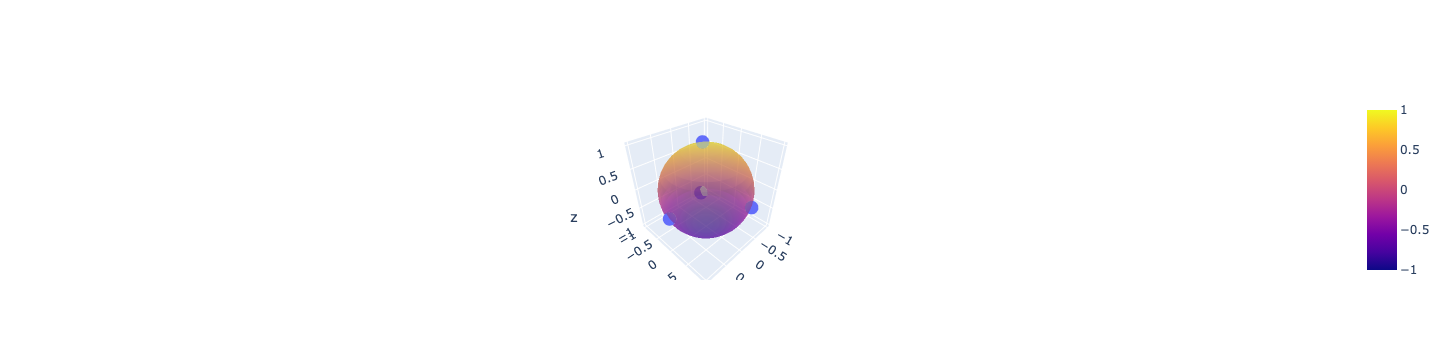

In [386]:
d=3
n=4
for i in range(0,5):
    print('i=',i)
    print('-----------------For four point 3-configuration:-------------------')
    distances, angles = calc_distance_angles(optimize(d,4),n)
    print('distances: ', distances)
    print('angles: ', angles)
    print('Distinct Sets of Distances:', len(np.unique(distances, axis = 0)))
    print('Distinct Sets of Angels:', len(np.unique(angles, axis = 0)))

distances.clear()
angles.clear()
plot3D(optimize(d,n))

#### Above 3d plot representing four-point 3-configuration 

### Q7. Find five-point 3-configurations. What can you say about the sets of distances and angles between the points? How many distinct five-point configurations can you find?

#### We can observed from the distances and angles output that if I stand at one point say 1, I have two uniques views/sets of distances and angles between the points. Same observation from other points as well. So we have 2 classes of points from any other point.
#### For n=5
#### Set of distances: [0.0, 1.41, 1.41, 1.73, 1.73] [0.0, 1.41, 1.41, 1.41, 2.0]
#### Set of angles: [0.0, 90.0, 90.0, 120.0, 120.0] [0.0, 90.0, 90.0, 90.0, 180.0]
#### Running the configuration for different initial starting points, I am getting the same set of distances and angles.
#### Therefore, 1 distinct five-point configurations can be found

In [391]:
## Ques 7: Find five-point 3-configurations.
d = 3
n = 5
for i in range(0,5):
    print('i=',i)
    print('-----------------For five point 3-configuration:-------------------')
    ans = optimize(d,n)
    distances, angles = calc_distance_angles(ans,n)
    print('distances: ', distances)
    print('angles: ', angles)
    print('Distinct Sets of Distances:', len(np.unique(distances, axis = 0)))
    print('Distinct Sets of Angels:', len(np.unique(angles, axis = 0)))


i= 0
-----------------For five point 3-configuration:-------------------
distances:  [[0.0, 1.41, 1.41, 1.73, 1.73], [0.0, 1.41, 1.41, 1.73, 1.73], [0.0, 1.41, 1.41, 1.73, 1.73], [0.0, 1.41, 1.41, 1.41, 2.0], [0.0, 1.41, 1.41, 1.41, 2.0]]
angles:  [[0.0, 90.0, 90.0, 120.0, 120.0], [0.0, 90.0, 90.0, 120.0, 120.0], [0.0, 90.0, 90.0, 120.0, 120.0], [0.0, 90.0, 90.0, 90.0, 180.0], [0.0, 90.0, 90.0, 90.0, 180.0]]
Distinct Sets of Distances: 2
Distinct Sets of Angels: 2
i= 1
-----------------For five point 3-configuration:-------------------
distances:  [[0.0, 1.41, 1.41, 1.73, 1.73], [0.0, 1.41, 1.41, 1.73, 1.73], [0.0, 1.41, 1.41, 1.41, 2.0], [0.0, 1.41, 1.41, 1.73, 1.73], [0.0, 1.41, 1.41, 1.41, 2.0]]
angles:  [[0.0, 90.0, 90.0, 120.0, 120.0], [0.0, 90.0, 90.0, 120.0, 120.0], [0.0, 90.0, 90.0, 90.0, 180.0], [0.0, 90.0, 90.0, 120.0, 120.0], [0.0, 90.0, 90.0, 90.0, 180.0]]
Distinct Sets of Distances: 2
Distinct Sets of Angels: 2
i= 2
-----------------For five point 3-configuration:---------

### Q8. For n = 2,3,4, . . . , 20, characterize all the 3-configurations you can find in terms of their regularity.

In [347]:
### Code for Q8
d = 3
n = 20
for n in range(2,21):
    ans = optimize(d,n)
    distances, angles = calc_distance_angles(ans,n)
    print(n, ':', min(len(np.unique(distances, axis = 0)), len(np.unique(angles, axis = 0))))
# plot3D(ans)

20 : 4


In [413]:
# Function to calculate the rank of the matrix
def rank(X, eps=1e-12):
    u, s, vh = np.linalg.svd(X)
    return len([x for x in s if abs(x) > eps])

### Q9. For what n are Goncharov 4-configurations less than four-dimensional?


#### To find the dimension and the shape, first we get the corresponding vectors (edges b/w the points) 
#### The dimension will be represented by linearly independent vectors in the set of edges.
#### The set of vectors will form a shape when all 'n' points are joined and dimension of the shape -> number of linearly independent edges.
#### We can create a matrix of vectors representing edges between points, the number of linearly independent vectors in these set of edges(i.e matrix) will represent the dimension.
#### We can find the number of dimensions in column space of resultant matrix by computing its rank. The rank of a matrix is equal to the dimension of its column space.
### Rank = No. of Dimensions in the Column Space
#### For n = 2 | Dimension = 1 | Shape: Line
#### For n = 3 | Dimension = 2 | Shape: Plane
#### For n = 4 | Dimension = 3 | Shape: 3D


In [417]:
d = 4
for n in range(2,10):
    ans = optimize(d,n)
    if rank(ans) < 4:
        print('Dimension for n=',n,':',rank(ans))


Dimension for n= 2 : 1
Dimension for n= 3 : 2
Dimension for n= 4 : 3


### Q10. Find a regular 4-configuration that is four dimensional. What n did you find?

#### Regular 4-configuration method can be obtained for n=5

In [419]:
### Q10 code goes here
d = 4
for n in range(2,10):
    ans = optimize(d,n)
    if rank(ans) == 4:
        print('Dimension for n =',n,':',rank(ans))
        break

Dimension for n= 5 : 4


### Q11. Sample points uniformly on the unit sphere by picking a vector Z = (Z1, Z2, . . . , Zd),with Zi ∼ N (0, 1), and then scale Z to be a unit vector. For a set of 10 points in d = 3 dimensions generated inthis way, estimate the average distance from a point to its nearest neighbor, and the variance of this distance. Compare to the average distance in a 10-point Goncharov 3-configuration between any point and its nearestneighbor. Which gives you more uniform coverage of the sphere, and why?

#### We can observe from the output below that the Goncharov 3-configuration gives more uniform coverage. This can be observed from the variance of the points that we got using Goncharov 3-configuration. The variance is significantly smaller than what we have achieved by taking random samples. The points are arranged in a way that maximizes the minimum distance between any two points.In contrast, the method of uniformly sampling points from the unit sphere using the method described does not guarantee  that the points will be uniformly distributed on the sphere. 

#### The average distance is also greater for Goncharov 3-configuration which is expected as it arranges the points in a way that maximized the distance between any two points.

##### Sample points | Average distance:  0.4005277375024123
##### Sample points | Variance:  0.0375308551812642
##### 10-point Goncharov configuration | Average Distance: 1.079219353422548
##### 10-point Goncharov configuration | Variance: 5.103537204608026e-13

In [51]:
# Generate a set of points uniformly on the unit sphere
def generatePoints():
    points = []
    for i in range(n):
      z = np.random.normal(size=d)
      points.append(z / np.linalg.norm(z))
    return points    

def getAverageNearestNeighborDistance(points):
    distances = []
    for i in range(n):
        nearest_neighbor_distance = float("inf")
        for j in range(n):
            if j != i:
                distance = np.linalg.norm(points[i] - points[j])
                if distance < nearest_neighbor_distance:
                    nearest_neighbor_distance = distance
        distances.append(nearest_neighbor_distance)
    return [np.mean(distances),np.var(distances)]
    

num_simulations = 1000
average_distances = []
variances = []

for i in range(num_simulations):
    points = generatePoints()
    average_distances.append(getAverageNearestNeighborDistance(points)[0])
    variances.append(getAverageNearestNeighborDistance(points)[1])

average_distance = np.mean(average_distances)
variance = np.mean(variances)
print("Sample points | Average distance: ", average_distance)
print("Sample points | Variance: ", variance)    

# Using 10-point Goncharov configuration
d = 3
n = 10
vals = optimize(d,n)

g_list = []
for i in range(n):
    nnd = float("inf")
    for j in range(n):
         if j != i:
            d = np.linalg.norm(vals[i] - vals[j])
            if d < nnd:
                nnd = d
    g_list.append(nnd)
        

print("10-point Goncharov configuration | Average Distance:", np.mean(g_list))
print("10-point Goncharov configuration | Variance:", np.var(g_list))

# plot3D(vals)
# plot3D(points)

Sample points | Average distance:  0.4005277375024123
Sample points | Variance:  0.0375308551812642
10-point Goncharov configuration | Average Distance: 1.079219353422548
10-point Goncharov configuration | Variance: 5.103537204608026e-13


#### We can see that the Goncharov 3-configuration gives more uniform coverage. This can be observed from the variance of the points that we got using Goncharov 3-configuration. The variance is significantly smaller than what we have achieved by taking random samples. The points are arranged in a way that maximizes the minimum distance between any two points.In contrast, the method of uniformly sampling points from the unit sphere using the method described does not guarantee  that the points will be uniformly distributed on the sphere. 